# Revewing map data downloaded from Natural Earth

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the shapefile
shapefile_path = "data\country_pov\geoBoundaries-IND\geoBoundaries-IND-ADM4_simplified.dbf"
# shapefile_path = "data\country_pov\geoBoundaries-IND\geoBoundaries-IND-ADM4.dbf"
shapefile_path2 = "data\country_pov\ind\\ne_10m_admin_0_countries_ind.dbf"
# Read the shapefile into a GeoDataFrame
df = gpd.read_file(shapefile_path)
df2 = gpd.read_file(shapefile_path2)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, dist in df2.sample(12).iterrows():
    print(dist['SOVEREIGNT'])
    gpd.GeoSeries([dist['geometry']]).plot(ax=ax)
    if i ==6:
        break

plt.show()

In [ ]:
districts = [
    "Anantnag",
    "Baramulla",
    "Budgam",
    "Ganderbal",
    "Kupwara",
    "Kulgam",
    "Pulwama",
    "Shopian",
    "Bandipore",
    # "Srinagar",
    "Jammu",
    "Kathua",
    "Rajouri",
    "Poonch",
    "Samba",
    "Udhampur",
    "Doda",
    "Kishtwar",
    "Ramban",
    "Reasi",

]
filtered_df = df[df['shapeName'].isin(districts)]

fig, ax = plt.subplots(figsize=(10, 6))

for i, dist in filtered_df.iterrows():
    # print(i, dist['shapeName'], dist['geometry'])
    gpd.GeoSeries([dist['geometry']]).plot(ax=ax)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, dist in df.iterrows():
    print(i, dist['shapeName'])
    gpd.GeoSeries([dist['geometry']]).plot(ax=ax)

plt.show()

# Loading the Data

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the shapefile
shapefile_path1 = "data\country_pov\chi\\ne_10m_admin_0_countries_chn.dbf"
shapefile_path2 = "data\country_pov\ind\\ne_10m_admin_0_countries_ind.dbf"
shapefile_path3 = "data\country_pov\pak\\ne_10m_admin_0_countries_pak.dbf"

# Read the shapefile into a GeoDataFrame
df1 = gpd.read_file(shapefile_path1)
df2 = gpd.read_file(shapefile_path2)
df3 = gpd.read_file(shapefile_path3)

# read any data files to plot
conflicts = pd.read_csv("data\info25\conflicts.csv")

# make subsets to view how a country see's another country's boundary
# the country POV comes from the "ADM0_A3_CN" attribute
# how China sees China borders
chn_map = df1[df1['ADM0_A3_CN']=='CHN']['geometry']
# how China sees India borders
ind_map = df2[df2['ADM0_A3_IN']=='IND']['geometry']
# how Pakistan sees Pakistan borders
pak_map = df3[df3['ADM0_A3_PK']=='PAK']['geometry']
# how China sees Pakistan borders
pak_map2 = df1[df1['ADM0_A3_CN']=='PAK']['geometry']
# how India sees Pakistan borders
pak_map3 = df2[df2['ADM0_A3_IN']=='PAK']['geometry']

## Getting borders and marking Conflicts

d:\My Projects\04 Geomap Analysis\geomap-Markhor-25\virtual\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
d:\My Projects\04 Geomap Analysis\geomap-Markhor-25\virtual\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


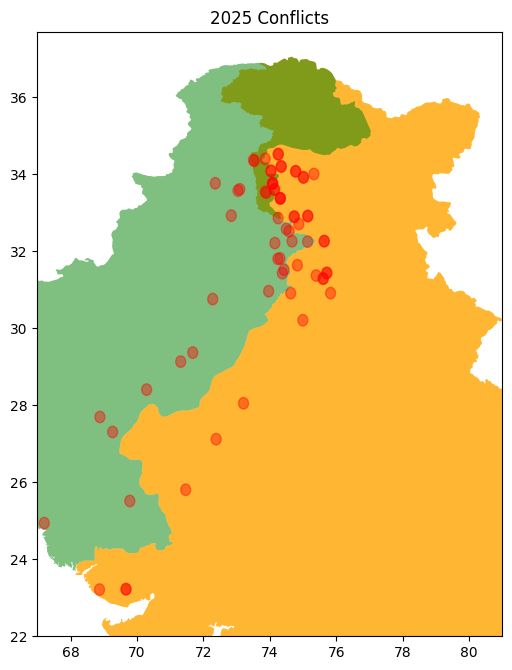

In [ ]:
from shapely.plotting import plot_polygon

fig, ax = plt.subplots(figsize=(6, 8))

## plot country maps, and transperancy should help in blending them
ind_map.plot(ax=ax,color='orange',alpha=0.8)
pak_map2.plot(ax=ax,color='green',alpha=0.5)

# go through conflict sheet and plot a circle, transperency will help to identify darker circles shouwing repeated conflicts
for i,con in conflicts.iterrows():
    circle = plt.Circle((con['loc_y'],(con['loc_x'])), radius=0.15,color='red',alpha=0.4, fill=True)
    ax.add_patch(circle)

# Set graph limits
plt.ylim(22,37.7)  # Set x-axis max to 12
plt.xlim(67, 81) # Set y-axis max to 1.5
plt.title('2025 Conflicts')

plt.show()


## Getting POK intersection

d:\My Projects\04 Geomap Analysis\geomap-Markhor-25\virtual\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
d:\My Projects\04 Geomap Analysis\geomap-Markhor-25\virtual\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
d:\My Projects\04 Geomap Analysis\geomap-Markhor-25\virtual\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


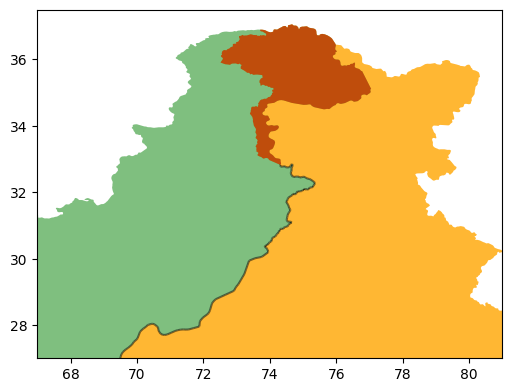

In [7]:
from shapely.plotting import plot_polygon

fig, ax = plt.subplots(figsize=(6, 8))

# find intersections in hte boundaries
pok = gpd.GeoSeries(pak_map2.iloc[0].intersection(ind_map.iloc[0]).geoms[0])
border = gpd.GeoSeries(pak_map2.iloc[0].intersection(ind_map.iloc[0]).geoms[1:])

## plot country maps, and transperancy should help in blending them
ind_map.plot(ax=ax,color='orange',alpha=0.8)
pak_map2.plot(ax=ax,color='green',alpha=0.5)
pok.plot(ax=ax,color='red',alpha=0.5)
border.plot(ax=ax,color='black',alpha=0.5)

# Set graph limits
plt.ylim(27,37.5)  # Set x-axis max to 12
plt.xlim(67, 81) # Set y-axis max to 1.5

plt.show()